In [51]:
import pandas as pd
import numpy as np
import re
from datetime import date, timedelta

### Données hospitalières

In [52]:
df = pd.read_csv('../data/raw/donnees-hospitalieres-covid19-raw.csv', sep=';')

In [53]:
df.head(30) # Show first 30

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6
5,02,2,2020-03-18,22,6,7,5
6,03,0,2020-03-18,4,0,1,0
7,03,1,2020-03-18,1,0,0,0
8,03,2,2020-03-18,3,0,1,0
9,04,0,2020-03-18,3,1,2,0


In [54]:
df.describe()

,sexe,hosp,rea,rad,dc
count,66966.000000,66966.000000,66966.000000,66966.000000,66966.000000
mean,1.000000,81.672655,11.962488,456.229549,113.547352
std,0.816503,184.010924,34.952277,773.896845,202.608014
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,0.000000,66.000000,13.000000
50%,1.000000,22.000000,2.000000,171.000000,41.000000
75%,2.000000,71.000000,9.000000,460.000000,107.000000
max,2.000000,3281.000000,855.000000,8039.000000,2019.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66966 entries, 0 to 66965
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     66963 non-null  object
 1   sexe    66966 non-null  int64 
 2   jour    66966 non-null  object
 3   hosp    66966 non-null  int64 
 4   rea     66966 non-null  int64 
 5   rad     66966 non-null  int64 
 6   dc      66966 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 3.6+ MB


In [56]:
# edit the following days : 2020-06-27, 2020-06-28, 2020-06-29
df['jour'] = df['jour'].replace('27/06/2020', '2020-06-27')
df['jour'] = df['jour'].replace('28/06/2020', '2020-06-28')
df['jour'] = df['jour'].replace('29/06/2020', '2020-06-29')

In [57]:
# create a filter for all genders
all_gender_filter = df['sexe'] == 0

In [58]:
date_pattern = re.compile("[0-9]{4}-[0-9]{2}-[0-9]{2}")
pattern_matcher_filter = df['jour'].str.match(pat = date_pattern)

In [59]:
# create a filter for yesterday's cases
yesterday = date.today() - timedelta(days = 1)
yesterday_filter = df['jour'] == yesterday.strftime('%Y-%m-%d')
yesterday_df = df.where(yesterday_filter & all_gender_filter & pattern_matcher_filter)

In [60]:
yesterday_df = yesterday_df.dropna() #remove NaN rows

In [61]:
yesterday_df.describe()

,sexe,hosp,rea,rad,dc
count,101.0,101.000000,101.000000,101.000000,101.000000
mean,0.0,162.910891,25.495050,1095.336634,233.772277
std,0.0,221.506438,39.069073,1530.558874,341.634304
min,0.0,8.000000,1.000000,38.000000,5.000000
25%,0.0,42.000000,5.000000,211.000000,47.000000
50%,0.0,81.000000,12.000000,510.000000,105.000000
75%,0.0,165.000000,21.000000,1235.000000,245.000000
max,0.0,1096.000000,187.000000,8039.000000,2019.000000


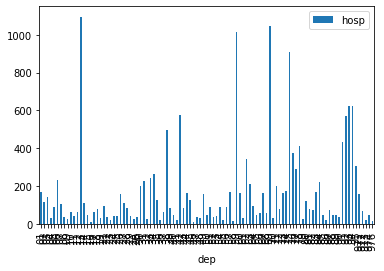

In [62]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'hosp')

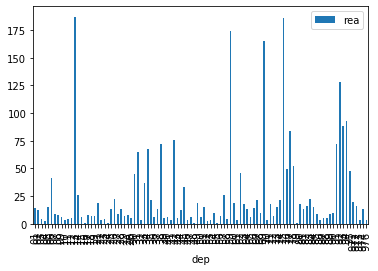

In [63]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'rea')

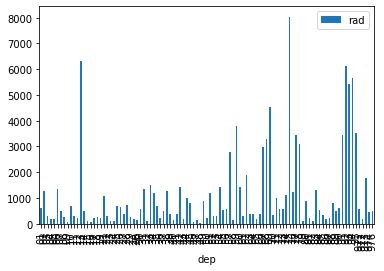

In [64]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'rad')

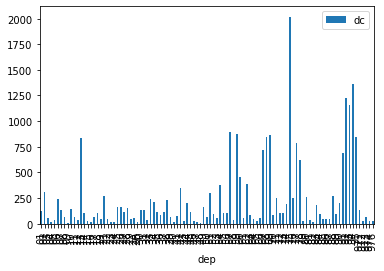

In [65]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'dc')

In [66]:
last_month = date.today() - timedelta(days = 30)
last_month_filter = df['jour'] >= last_month.strftime('%Y-%m-%d')
last_month_df = df.where(last_month_filter & all_gender_filter & pattern_matcher_filter).dropna()
last_month_df = last_month_df.groupby(['jour'])
last_month_df.head()
last_month_df.sum()['hosp']

jour
2020-09-26     6154.0
2020-09-27     6235.0
2020-09-28     6397.0
2020-09-29     6482.0
2020-09-30     6572.0
2020-10-01     6634.0
2020-10-02     6740.0
2020-10-03     6740.0
2020-10-04     6964.0
2020-10-05     7276.0
2020-10-06     7377.0
2020-10-07     7514.0
2020-10-08     7603.0
2020-10-09     7843.0
2020-10-10     7976.0
2020-10-11     8231.0
2020-10-12     8671.0
2020-10-13     8928.0
2020-10-14     9173.0
2020-10-16    10021.0
2020-10-17    10399.0
2020-10-18    10897.0
2020-10-19    11640.0
2020-10-20    12435.0
2020-10-21    13162.0
2020-10-22    14009.0
2020-10-23    14985.0
2020-10-24    15637.0
2020-10-25    16454.0
Name: hosp, dtype: float64

In [67]:
week_title = 'Tendance du ' + last_month.strftime('%d/%m/%Y') + ' au ' + yesterday.strftime('%d/%m/%Y')

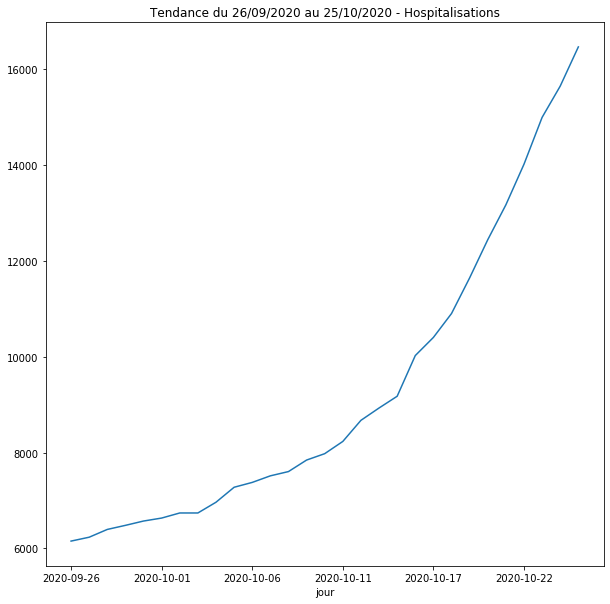

In [68]:
last_month_df.sum()['hosp'].plot(title = week_title + ' - Hospitalisations', figsize= (10,10))

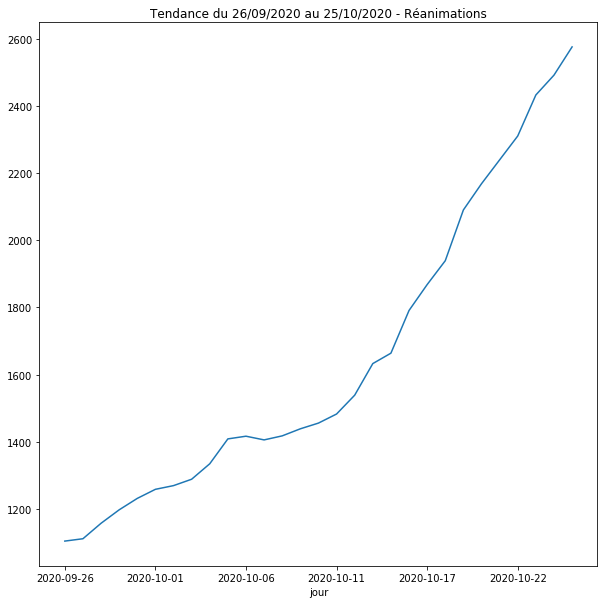

In [69]:
last_month_df.sum()['rea'].plot(title = week_title + ' - Réanimations', figsize= (10,10))

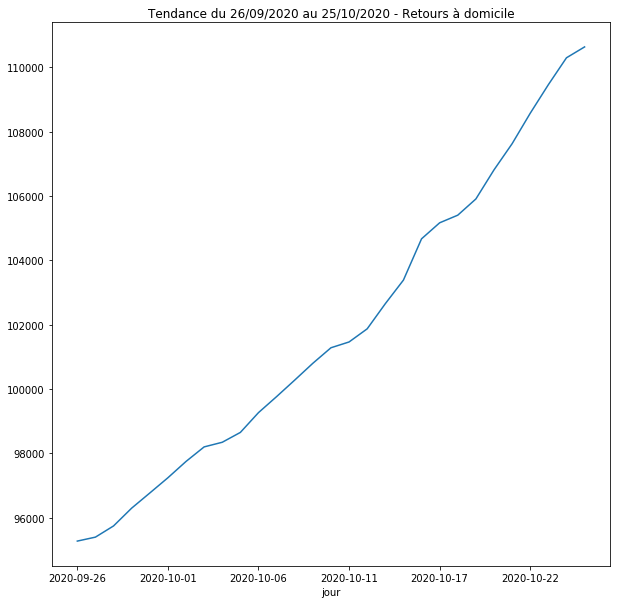

In [70]:
last_month_df.sum()['rad'].plot(title = week_title + ' - Retours à domicile', figsize= (10,10))

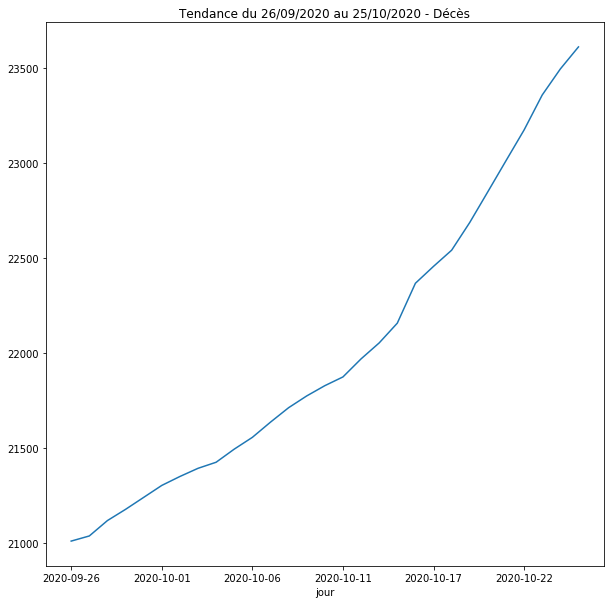

In [71]:
last_month_df.sum()['dc'].plot(title = week_title + ' - Décès', figsize= (10,10))

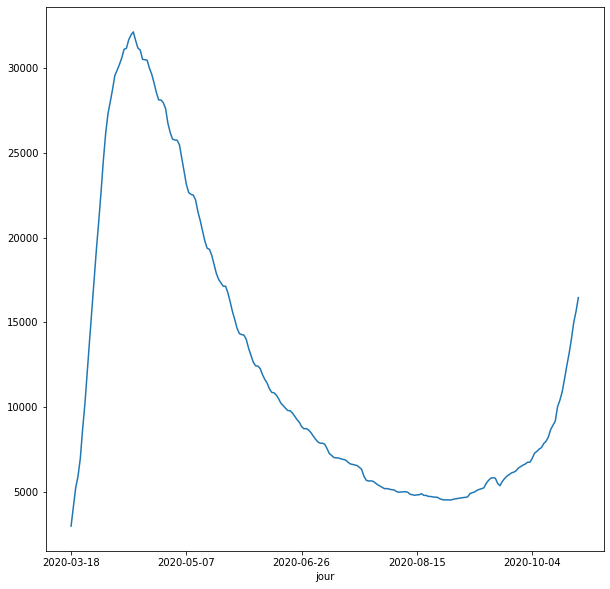

In [72]:
test = df.where(all_gender_filter).groupby('jour').sum()['hosp'].plot(figsize = (10, 10))

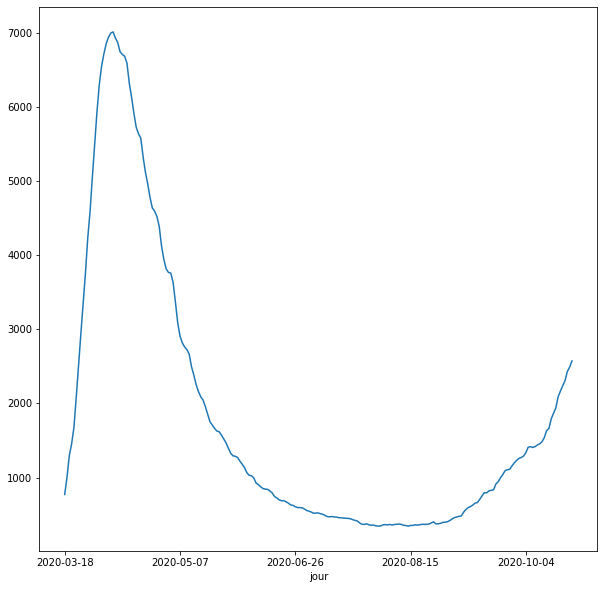

In [73]:
df.where(all_gender_filter).groupby('jour').sum()['rea'].plot(figsize = (10, 10))

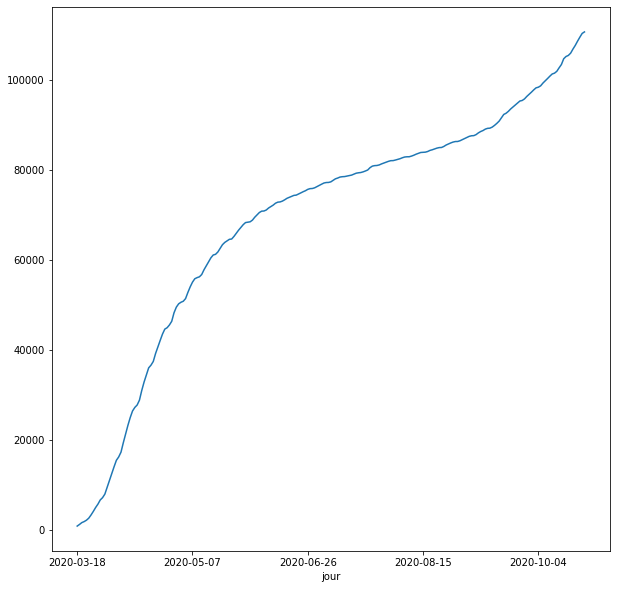

In [74]:
df.where(all_gender_filter).groupby('jour').sum()['rad'].plot(figsize = (10, 10))

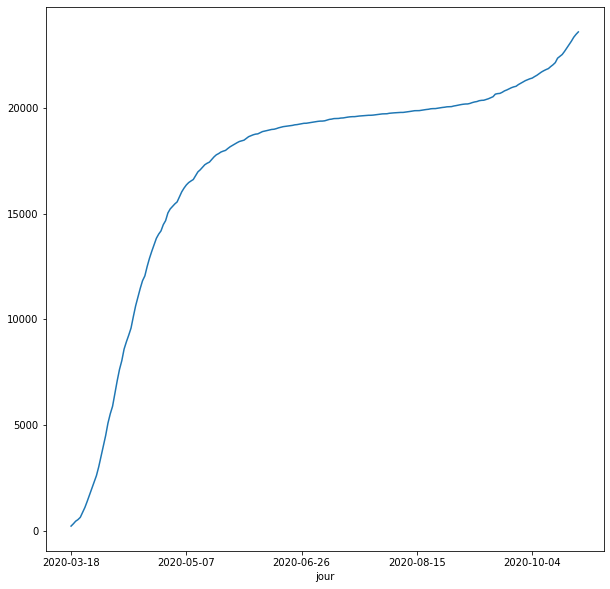

In [75]:
df.where(all_gender_filter).groupby('jour').sum()['dc'].plot(figsize = (10, 10))